## Modelado y entrenamiento de modelos de aprendizaje automatico

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from numpy import concatenate
import matplotlib.pyplot as plt
from pandas import datetime
import datetime as dt  # Python standard library datetime  module
import math
from math import sqrt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Dropout
from keras.callbacks import Callback

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import pydotplus
import os

pd.set_option("display.max_columns", 200)
pd.options.display.max_rows = 200

/home/horacio/anaconda3/envs/diplo/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/home/horacio/anaconda3/envs/diplo/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/horacio/anaconda3/envs/diplo/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ho

Importamos el dataset curado en las etapas anteriores con la intención de predecir el caudal del río Santa Rosa de Calamuchita (Córdoba) con una anticipación de 6 horas.

In [2]:
df = pd.read_csv('santa_rosa_meteo.csv', parse_dates=True, index_col=0)
df.drop(columns=['Codigo','dia','mes','anio'], inplace=True)
df.head(100)

,Temperatura_[Celsius]_x,HumedadRel_[porc],Presion_[hPa],DireccionViento_[grad],VelocidadViento_[KpH]_x,RadiacionSolar_[WpM2],Lluvia_[mm],RafagaViento_[KpH],SenialGPRS_[ASU],NivelBateria_[V]
2018-08-15 13:00:00,18.610000,23.040000,945.625000,90.0,3.158330,454.2795,0.0,6.970450,5.500000,12.793650
2018-08-15 13:30:00,18.170000,23.716667,946.458333,127.5,5.216943,663.5760,4.0,15.510000,6.000000,13.158733
2018-08-15 14:00:00,18.826667,22.263333,944.791667,67.5,4.606737,644.9290,0.0,14.504167,6.000000,13.172933
2018-08-15 14:30:00,19.026667,22.583333,943.958333,90.0,4.526270,593.4890,0.0,12.566257,6.000000,13.215467
2018-08-15 15:00:00,19.150000,21.816667,943.958333,90.0,0.000000,599.2760,0.0,0.000000,6.000000,13.229633
2018-08-15 15:30:00,18.890000,22.536667,944.583333,90.0,0.000000,398.0170,0.0,0.000000,6.000000,13.215433
2018-08-15 16:00:00,19.143333,22.780000,944.375000,75.0,4.499450,378.7270,0.0,15.328967,6.000000,13.236700
2018-08-15 16:30:00,19.243333,22.643333,944.583333,75.0,6.115493,357.5080,4.2,15.610600,6.000000,13.094933
2018-08-15 17:00:00,18.730000,23.553333,944.583333,75.0,6.155723,309.9260,0.0,19.204767,6.000000,13.045267
2018-08-15 17:30:00,18.056667,24.193333,944.375000,60.0,5.505283,137.6020,0.0,13.397747,6.000000,13.123300


Incorporamos los datos de caudales y los sampleamos cada 30 minutos, para luego mergear con el resto del dataset y asi preparar el "lag" deseado: E.e. dato que la información contenida en el dataset (tal como fue contruido hasta el momento) representa un punto t en el tiempo por cada línea nos interesa disponerla de tal forma que en cada línea tambien se anote la información correspondiente a los puntos en el tiempo t-1,...,t-n.

In [3]:
caudales = pd.read_csv('./dataset/Datos_Caudales/RioSantaRosa.csv', index_col='date_time', parse_dates=True)
caudales_resampled = caudales.resample('30T').sum()
caudales_resampled.head()

,Caudal_m3/s
date_time,
2018-11-20 16:00:00,2.252353
2018-11-20 16:30:00,7.344448
2018-11-20 17:00:00,6.160122
2018-11-20 17:30:00,4.600502
2018-11-20 18:00:00,6.258754


In [4]:
df_complete = df.merge(caudales_resampled, left_index=True, right_index=True, how='inner')
df_complete.head()

,Temperatura_[Celsius]_x,HumedadRel_[porc],Presion_[hPa],DireccionViento_[grad],VelocidadViento_[KpH]_x,RadiacionSolar_[WpM2],Lluvia_[mm],RafagaViento_[KpH],SenialGPRS_[ASU],NivelBateria_[V],Caudal_m3/s
2018-11-20 16:00:00,34.413333,26.690000,932.708333,120.0,5.666220,812.752,0.0,21.638900,6.0,13.314700,2.252353
2018-11-20 16:30:00,34.366667,25.003333,933.125000,67.5,6.584880,682.866,0.0,23.415900,6.0,13.279267,7.344448
2018-11-20 17:00:00,33.950000,24.830000,932.083333,67.5,7.852237,602.491,0.0,26.373033,6.0,13.300500,6.160122
2018-11-20 17:30:00,33.586667,24.046667,931.666667,90.0,6.343483,474.534,0.0,16.824320,6.0,13.279267,4.600502
2018-11-20 18:00:00,33.176667,23.960000,932.500000,90.0,6.940277,374.226,0.0,22.980033,6.0,13.258000,6.258754


In [5]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [6]:
df_supervised = series_to_supervised(df_complete, n_in=24, n_out=1)
df_supervised.head()

,var1(t-24),var2(t-24),var3(t-24),var4(t-24),var5(t-24),var6(t-24),var7(t-24),var8(t-24),var9(t-24),var10(t-24),var11(t-24),var1(t-23),var2(t-23),var3(t-23),var4(t-23),var5(t-23),var6(t-23),var7(t-23),var8(t-23),var9(t-23),var10(t-23),var11(t-23),var1(t-22),var2(t-22),var3(t-22),var4(t-22),var5(t-22),var6(t-22),var7(t-22),var8(t-22),var9(t-22),var10(t-22),var11(t-22),var1(t-21),var2(t-21),var3(t-21),var4(t-21),var5(t-21),var6(t-21),var7(t-21),var8(t-21),var9(t-21),var10(t-21),var11(t-21),var1(t-20),var2(t-20),var3(t-20),var4(t-20),var5(t-20),var6(t-20),var7(t-20),var8(t-20),var9(t-20),var10(t-20),var11(t-20),var1(t-19),var2(t-19),var3(t-19),var4(t-19),var5(t-19),var6(t-19),var7(t-19),var8(t-19),var9(t-19),var10(t-19),var11(t-19),var1(t-18),var2(t-18),var3(t-18),var4(t-18),var5(t-18),var6(t-18),var7(t-18),var8(t-18),var9(t-18),var10(t-18),var11(t-18),var1(t-17),var2(t-17),var3(t-17),var4(t-17),var5(t-17),var6(t-17),var7(t-17),var8(t-17),var9(t-17),var10(t-17),var11(t-17),var1(t-16),var2(t-16),var3(t-16),var4(t-16),var5(t-16),var6(t-16),var7(t-16),var8(t-16),var9(t-16),var10(t-16),var11(t-16),var1(t-15),...,var11(t-9),var1(t-8),var2(t-8),var3(t-8),var4(t-8),var5(t-8),var6(t-8),var7(t-8),var8(t-8),var9(t-8),var10(t-8),var11(t-8),var1(t-7),var2(t-7),var3(t-7),var4(t-7),var5(t-7),var6(t-7),var7(t-7),var8(t-7),var9(t-7),var10(t-7),var11(t-7),var1(t-6),var2(t-6),var3(t-6),var4(t-6),var5(t-6),var6(t-6),var7(t-6),var8(t-6),var9(t-6),var10(t-6),var11(t-6),var1(t-5),var2(t-5),var3(t-5),var4(t-5),var5(t-5),var6(t-5),var7(t-5),var8(t-5),var9(t-5),var10(t-5),var11(t-5),var1(t-4),var2(t-4),var3(t-4),var4(t-4),var5(t-4),var6(t-4),var7(t-4),var8(t-4),var9(t-4),var10(t-4),var11(t-4),var1(t-3),var2(t-3),var3(t-3),var4(t-3),var5(t-3),var6(t-3),var7(t-3),var8(t-3),var9(t-3),var10(t-3),var11(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var6(t-2),var7(t-2),var8(t-2),var9(t-2),var10(t-2),var11(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t),var11(t)
2018-11-21 04:00:00,34.413333,26.690000,932.708333,120.0,5.666220,812.752,0.0,21.638900,6.0,13.314700,2.252353,34.366667,25.003333,933.125000,67.5,6.584880,682.866,0.0,23.415900,6.0,13.279267,7.344448,33.950000,24.830000,932.083333,67.5,7.852237,602.491,0.0,26.373033,6.0,13.300500,6.160122,33.586667,24.046667,931.666667,90.0,6.343483,474.534,0.0,16.824320,6.0,13.279267,4.600502,33.176667,23.960000,932.500000,90.0,6.940277,374.226,0.0,22.980033,6.0,13.258000,6.258754,32.590000,27.200000,932.083333,82.5,5.646103,250.127,0.0,18.782333,6.0,13.130400,4.353730,30.940000,29.730000,932.708333,82.5,6.940280,134.387,0.0,20.452033,6.0,13.073633,7.087714,29.390000,30.840000,932.500000,75.0,4.794493,30.864,0.0,16.911467,6.0,13.009833,7.529703,27.926667,32.213333,932.708333,75.0,3.667953,0.0,0.0,9.474997,6.0,12.9673,5.404183,26.470000,...,2.546415,19.716667,57.730000,934.583333,75.0,1.253943,0.0,0.0,3.587487,6.0,12.8326,1.948242,19.880000,56.980000,934.375000,172.5,1.300883,0.0,0.0,4.090407,6.0,12.8255,2.384228,18.730000,63.516667,934.375000,240.0,1.763570,0.0,0.0,4.452507,6.0,12.8113,0.000000,17.503333,69.456667,934.166667,292.5,1.381349,0.0,0.0,1.964734,6.0,12.8042,2.464787,16.093333,76.266667,933.750000,292.5,0.958897,0.0,0.0,2.749290,6.0,12.7830,7.451393,15.356667,80.320000,933.125000,202.5,1.052777,0.0,0.0,2.957160,6.0,12.775900,0.000000,15.403333,81.736667,933.333333,22.5,0.710791,0.0,0.0,1.971441,6.0,12.761700,8.128753,15.660000,79.086667,933.958333,210.0,2.729170,0.0,0.0,8.918433,6.0,12.761700,2.912305,16.516667,73.643333,932.500000,270.0,2.259780,0.0,0.0,5.773507,6.0,12.754600,0.000000
2018-11-21 04:30:00,34.366667,25.003333,933.125000,67.5,6.584880,682.866,0.0,23.415900,6.0,13.279267,7.344448,33.950000,24.830000,932.083333,67.5,7.852237,602.491,0.0,26.373033,6.0,13.300500,6.160122,33.586667,24.046667,931.666667,90.0,6.343483,474.534,0.0,16.824320,6.0,1

Definimos el target set y el train set

In [7]:
train = df_supervised.loc[:,:'var11(t-13)']
target = df_supervised.iloc[:,-1]
print(train.shape, target.shape)

(12760, 132) (12760,)


In [8]:
train.head()

,var1(t-24),var2(t-24),var3(t-24),var4(t-24),var5(t-24),var6(t-24),var7(t-24),var8(t-24),var9(t-24),var10(t-24),var11(t-24),var1(t-23),var2(t-23),var3(t-23),var4(t-23),var5(t-23),var6(t-23),var7(t-23),var8(t-23),var9(t-23),var10(t-23),var11(t-23),var1(t-22),var2(t-22),var3(t-22),var4(t-22),var5(t-22),var6(t-22),var7(t-22),var8(t-22),var9(t-22),var10(t-22),var11(t-22),var1(t-21),var2(t-21),var3(t-21),var4(t-21),var5(t-21),var6(t-21),var7(t-21),var8(t-21),var9(t-21),var10(t-21),var11(t-21),var1(t-20),var2(t-20),var3(t-20),var4(t-20),var5(t-20),var6(t-20),var7(t-20),var8(t-20),var9(t-20),var10(t-20),var11(t-20),var1(t-19),var2(t-19),var3(t-19),var4(t-19),var5(t-19),var6(t-19),var7(t-19),var8(t-19),var9(t-19),var10(t-19),var11(t-19),var1(t-18),var2(t-18),var3(t-18),var4(t-18),var5(t-18),var6(t-18),var7(t-18),var8(t-18),var9(t-18),var10(t-18),var11(t-18),var1(t-17),var2(t-17),var3(t-17),var4(t-17),var5(t-17),var6(t-17),var7(t-17),var8(t-17),var9(t-17),var10(t-17),var11(t-17),var1(t-16),var2(t-16),var3(t-16),var4(t-16),var5(t-16),var6(t-16),var7(t-16),var8(t-16),var9(t-16),var10(t-16),var11(t-16),var1(t-15),var2(t-15),var3(t-15),var4(t-15),var5(t-15),var6(t-15),var7(t-15),var8(t-15),var9(t-15),var10(t-15),var11(t-15),var1(t-14),var2(t-14),var3(t-14),var4(t-14),var5(t-14),var6(t-14),var7(t-14),var8(t-14),var9(t-14),var10(t-14),var11(t-14),var1(t-13),var2(t-13),var3(t-13),var4(t-13),var5(t-13),var6(t-13),var7(t-13),var8(t-13),var9(t-13),var10(t-13),var11(t-13)
2018-11-21 04:00:00,34.413333,26.690000,932.708333,120.0,5.666220,812.752,0.0,21.638900,6.0,13.314700,2.252353,34.366667,25.003333,933.125000,67.5,6.584880,682.866,0.0,23.415900,6.0,13.279267,7.344448,33.950000,24.830000,932.083333,67.5,7.852237,602.491,0.0,26.373033,6.0,13.300500,6.160122,33.586667,24.046667,931.666667,90.0,6.343483,474.534,0.0,16.824320,6.0,13.279267,4.600502,33.176667,23.960000,932.500000,90.0,6.940277,374.226,0.0,22.980033,6.0,13.258000,6.258754,32.590000,27.200000,932.083333,82.5,5.646103,250.127,0.0,18.782333,6.0,13.130400,4.353730,30.940000,29.730000,932.708333,82.5,6.940280,134.387,0.0,20.452033,6.0,13.073633,7.087714,29.390000,30.840000,932.500000,75.0,4.794493,30.864,0.0,16.911467,6.0,13.009833,7.529703,27.926667,32.213333,932.708333,75.0,3.667953,0.0,0.0,9.474997,6.0,12.9673,5.404183,26.470000,36.110000,934.166667,67.5,0.891843,0.0,0.0,4.170873,6.0,12.9531,6.725226,23.286667,48.096667,934.166667,67.5,1.696513,0.0,0.0,2.460950,6.0,12.924800,7.427871,20.456667,59.490000,934.791667,67.5,1.207006,0.0,0.0,2.668823,6.0,12.903500,6.937931
2018-11-21 04:30:00,34.366667,25.003333,933.125000,67.5,6.584880,682.866,0.0,23.415900,6.0,13.279267,7.344448,33.950000,24.830000,932.083333,67.5,7.852237,602.491,0.0,26.373033,6.0,13.300500,6.160122,33.586667,24.046667,931.666667,90.0,6.343483,474.534,0.0,16.824320,6.0,13.279267,4.600502,33.176667,23.960000,932.500000,90.0,6.940277,374.226,0.0,22.980033,6.0,13.258000,6.258754,32.590000,27.200000,932.083333,82.5,5.646103,250.127,0.0,18.782333,6.0,13.130400,4.353730,30.940000,29.730000,932.708333,82.5,6.940280,134.387,0.0,20.452033,6.0,13.073633,7.087714,29.390000,30.840000,932.500000,75.0,4.794493,30.864,0.0,16.911467,6.0,13.009833,7.529703,27.926667,32.213333,932.708333,75.0,3.667953,0.000,0.0,9.474997,6.0,12.967300,5.404183,26.470000,36.110000,934.166667,67.5,0.891843,0.0,0.0,4.170873,6.0,12.9531,6.725226,23.286667,48.096667,934.166667,67.5,1.696513,0.0,0.0,2.460950,6.0,12.9248,7.427871,20.456667,59.490000,934.791667,67.5,1.207006,0.0,0.0,2.668823,6.0,12.903500,6.937931,18.676667,66.186667,934.375000,75.0,1.978147,0.0,0.0,3.795360,6.0,12.889300,4.149980
2018-11-21 05:00:00,33.950000,24.830000,932.083333,67.5,7.852237,602.491,0.0,26.373033,6.0,13.300500,6.160122,33.586667,24.046667,931.666667,90.0,6.343483,474.534,0.0,16.824320,6.0,13.279267,4.600502,33.176667,23.960000,932.500000,90.0,6.940277,374.226,0.0,22.980033,6.0,13.258000,6.258754,32.590000,27.200000,932.083333,82.5,5.646103,250.127,0.0,18.782333,6.0,13.130400,4.35

Armamos set de entrenamiento y de testeo.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.1, random_state=17)

Y al de entrenamiento lo subidivimos en entrenamiento y validacion.

In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=17)

### Random Forest

Primero intentamos predecir con un modelo de regresion simple pero eficaz, el Random Forest Regressor.
    En nuestra primera iteracion dejamos los paramentros por defecto y utilizamos todos los features para armar los arboles de decision.

In [11]:
random_forest = RandomForestRegressor(random_state=17, n_jobs=6)
random_forest.fit(X_train, y_train)
predictions_random_forest = random_forest.predict(X_valid)

In [12]:
random_forest_score = random_forest.score(X_train, y_train)
print('r2 score is: ', random_forest_score)
random_forest_score = random_forest.score(X_valid, y_valid)
print('r2 score is: ', random_forest_score)

r2 score is:  0.9311188373512325
r2 score is:  0.5685247604753938


Si bien el score se ve muy bien para ser un primer modelo, lo cierto es que hay una varianza importante en los datos segun como se corten los conjuntos de entrenamiento y testeo. Por esta tambien vamos a evaluar haciendo **cross validation** con cross_val_score. Primero repetimos **r2**. Una razon para repetir esta medida con cross validation es que el conjunto de entrenamiento es bastante chico (no llega a cubrir dos anios, es decir que no llega a cubrir dos ciclos completos de lluvia) y por ello cualquier varaiacion en los datos de testeo que se eligen genera un gran cambio en la calidad de las preciciones. La segunda razon es que tambien podemos usar la medad **rmse**, que nos da una medida de error de la prediccion mas relativa a lo que estamos midiendo: en este caso metros cubicos de agua por segundo (m3/s)

In [13]:
scores = cross_val_score(random_forest, train, target, cv=5, scoring='r2')
(scores)

array([ 6.69240854e-02,  5.75797552e-01, -1.72270689e-01, -2.86186868e+02,
        1.11024678e-01])

Puede observarse la ya mencionada drasticar varianza en los resultados de la prediccion segun el corte en el dataset

In [14]:
scores = cross_val_score(random_forest, train, target, cv=5, scoring='neg_root_mean_squared_error')
(-scores)

array([41.14460607, 27.26247328,  3.19334736,  6.99605917, 25.63966865])

Test Score: 16.7544 RMSE
y_test (OBS) max: 427.24767084999996 versus inv_yhat2 (SIM) max: 296.91428776547997


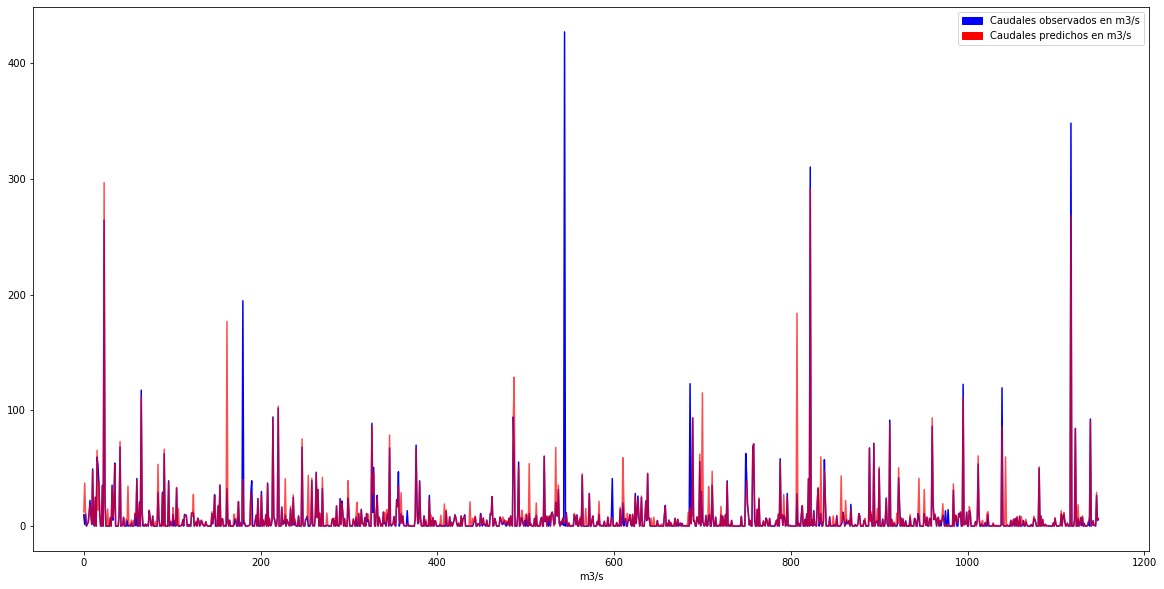

In [15]:
import matplotlib.patches as mpatches

y_valid_arr = np.array(y_valid).reshape((len(y_valid), 1))
#print(model3.summary())
testScore2 = math.sqrt(mean_squared_error(y_valid_arr, predictions_random_forest))
print('Test Score: %.4f RMSE' % (testScore2))
print('y_test (OBS) max:',np.max(y_valid),'versus inv_yhat2 (SIM) max:',np.max(predictions_random_forest))
plt.figure(figsize=(20,10))
plt.plot(y_valid_arr, color='blue', alpha=1)
plt.plot(predictions_random_forest,color='red', alpha=0.7, label="predicted value")
red_patch = mpatches.Patch(color='red', label='Caudales predichos en m3/s')
blue_patch = mpatches.Patch(color='blue', label='Caudales observados en m3/s')
plt.legend(handles=[blue_patch, red_patch])
plt.xlabel('timelapse')
plt.xlabel('m3/s')
plt.show()

### RF - features recortados

In [16]:
random_forest_feat_limit = RandomForestRegressor(random_state=17, n_jobs=6, max_features='sqrt')
random_forest_feat_limit.fit(X_train, y_train)
predictions_random_forest_feat_limit = random_forest_feat_limit.predict(X_valid)

In [17]:
predictions_random_forest_feat_limit

array([15.53996198, 14.47301378, 10.36960277, ..., 32.52571441,
        4.89838757,  5.95208253])

In [18]:
random_forest_score_feat_limit = random_forest_feat_limit.score(X_train, y_train)
print('r2 score for training set is: ', random_forest_score_feat_limit)
random_forest_score_feat_limit = random_forest_feat_limit.score(X_valid, y_valid)
print('r2 score for validation set is: ', random_forest_score_feat_limit)

r2 score for training set is:  0.943381275774273
r2 score for validation set is:  0.6437571451333787


Puede observarse que el arecortar la cantidad de caracteristicas usadas para entrenar el modelo mejora la precision del mismo. La seleccion de caracteristicas es hecha de modo automatas por el modelo, tomando las que mayor relevancia explicativa tienen. Mas abajo esta detallada la relevancia de cada feature.

In [19]:
scores = cross_val_score(random_forest_feat_limit, train, target, cv=5, scoring='r2')
(scores)

array([  0.19971932,   0.60189652,  -0.71285039, -84.35731199,
         0.19272227])

Sin embargo en los cortes efectuados por cross_val_score no hay una mejora clara en los resultados. Y este parecido en los sets de validacion tambien se replica en el rmse, que tiene valores muy parecidos al anterior.

In [20]:
scores_rmse_feat_limit = cross_val_score(random_forest_feat_limit, train, target, cv=5, scoring='neg_root_mean_squared_error')
(-scores_rmse_feat_limit)

array([38.10444021, 26.41050177,  3.86004106,  3.81409539, 24.43312637])

Test Score: 15.2239 RMSE
y_test (OBS) max: 427.24767084999996 versus inv_yhat2 (SIM) max: 298.86811933205996


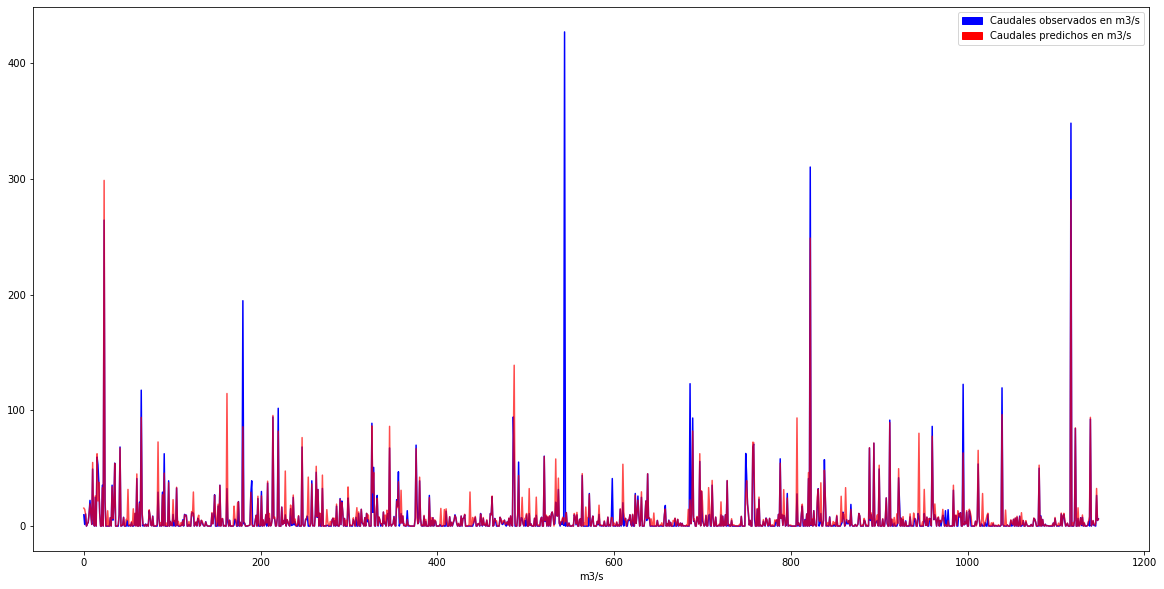

In [21]:
import matplotlib.patches as mpatches

y_valid_arr = np.array(y_valid).reshape((len(y_valid), 1))
#print(model3.summary())
testScore2 = math.sqrt(mean_squared_error(y_valid_arr, predictions_random_forest_feat_limit))
print('Test Score: %.4f RMSE' % (testScore2))
print('y_test (OBS) max:',np.max(y_valid),'versus inv_yhat2 (SIM) max:',np.max(predictions_random_forest_feat_limit))
plt.figure(figsize=(20,10))
plt.plot(y_valid_arr, color='blue', alpha=1)
plt.plot(predictions_random_forest_feat_limit,color='red', alpha=0.7, label="predicted value")
red_patch = mpatches.Patch(color='red', label='Caudales predichos en m3/s')
blue_patch = mpatches.Patch(color='blue', label='Caudales observados en m3/s')
plt.legend(handles=[blue_patch, red_patch])
plt.xlabel('timelapse')
plt.xlabel('m3/s')
plt.show()

In [22]:
random_forest.feature_importances_

array([3.15754238e-03, 7.18742946e-03, 8.01000086e-03, 3.77382205e-03,
       7.31287342e-03, 2.66108307e-04, 5.72627085e-03, 9.60655252e-03,
       3.62387450e-02, 1.11826565e-02, 4.41179287e-03, 2.95530320e-03,
       6.00402476e-03, 2.89147207e-03, 1.92386541e-03, 1.63439441e-03,
       3.70957690e-04, 1.02184895e-02, 1.15768274e-02, 4.89433844e-03,
       5.60099421e-03, 4.28149422e-03, 2.05833228e-03, 3.09042217e-03,
       2.45492676e-03, 6.21909970e-04, 2.67708984e-03, 8.17644440e-04,
       1.11440504e-02, 3.18704219e-03, 1.22865066e-03, 2.50372458e-03,
       2.55306233e-03, 1.85016362e-03, 2.47420978e-03, 1.61940971e-03,
       4.02326098e-03, 3.29399937e-03, 3.26508723e-04, 3.56042106e-02,
       3.63867140e-03, 3.98066850e-04, 2.26917005e-03, 2.68022697e-03,
       2.24026684e-03, 9.52249464e-04, 3.34008234e-03, 4.90380418e-03,
       3.44197520e-03, 6.62054303e-04, 1.08833507e-02, 4.91252724e-03,
       6.19318834e-04, 1.09395656e-03, 2.60892044e-03, 2.49159658e-03,
      

### Normalizacion y PCA

A continuacion aplicamos PCA como tecnica de reduccion de dimensionalidad. Pero antes es necesario escalar la informacion. Nos quedamos con un StandardScaler porque parte de la informacion tiene una disitrbucion normal. Pero tambien hemos probado con MinMax para obtener rangos entre 0-1, con resultados similares.

In [23]:
y_train.shape

(10335,)

In [24]:
scaler = StandardScaler()
scaler.fit(train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train))
X_valid_scaled = pd.DataFrame(scaler.transform(X_valid))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))
X_train_scaled.index, X_valid_scaled.index, X_test_scaled.index = X_train.index, X_valid.index, X_test.index

In [25]:
pca = PCA(n_components=0.99)

In [26]:
pca.fit(train)

PCA(copy=True, iterated_power='auto', n_components=0.99, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [27]:
X_train_pca = pd.DataFrame(pca.transform(X_train_scaled))
X_valid_pca = pd.DataFrame(pca.transform(X_valid_scaled))
X_test_pca = pd.DataFrame(pca.transform(X_test_scaled))
X_train_pca.index, X_valid_pca.index, X_test_pca.index = X_train.index, X_valid.index, X_test.index

In [28]:
X_train_pca.shape

(10335, 21)

In [29]:
pca.n_components_

21

#### PCA & RANDOM FOREST

In [30]:
random_forest_pca = RandomForestRegressor(random_state=17, n_jobs=6)
random_forest_pca.fit(X_train_pca, y_train)
predictions_random_forest_pca = random_forest_pca.predict(X_valid_pca)

In [31]:
random_forest_pca_score = random_forest_pca.score(X_train_pca, y_train)
print('r2 score for training set is: ', random_forest_pca_score)
random_forest_pca_score = random_forest_pca.score(X_valid_pca, y_valid)
print('r2 score for validation set is: ', random_forest_pca_score)

r2 score for training set is:  0.9048347495760963
r2 score for validation set is:  0.4285116991973984


In [32]:
train_pca = pca.transform(train)

In [33]:
scores_rmse_rf_pca = cross_val_score(
        random_forest_pca,
        train_pca, target, cv=5, scoring='r2'
)
scores_rmse_rf_pca

array([ 2.23627508e-02,  1.94574839e-01, -1.16298830e+01, -2.50351931e+02,
        7.61608063e-02])

In [34]:
scores_rmse_rf_pca = cross_val_score(random_forest_pca, train_pca, target, cv=5, scoring='neg_root_mean_squared_error')
-scores_rmse_rf_pca

array([42.1156288 , 37.56568081, 10.48170355,  6.5450399 , 26.13760241])

A continuacion graficamos el arbol de decision del primer arbol del bosque, que nos permite ver la importancia de los features y las decisiones especificas que llevan a la separacion de cada rama:

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.196277 to fit



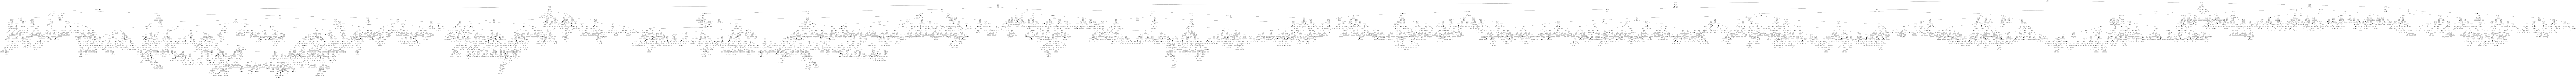

In [35]:
dot_data = StringIO()
export_graphviz(random_forest_pca.estimators_[0], out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

### Redes Neuronales

In [36]:
train_X2 = X_train_scaled.values.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
valid_X2 = X_valid_scaled.values.reshape((X_valid_scaled.shape[0], 1, X_valid_scaled.shape[1]))
print(train_X2.shape, y_train.shape, valid_X2.shape, y_valid.shape)

(10335, 1, 132) (10335,) (1149, 1, 132) (1149,)


### Network Design

In [37]:
model2 = Sequential()
model2.add(LSTM(50, input_shape=(train_X2.shape[1], train_X2.shape[2]), activation='relu'))
model2.add(Dense(1))
model2.compile(loss='mse', optimizer='adam')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


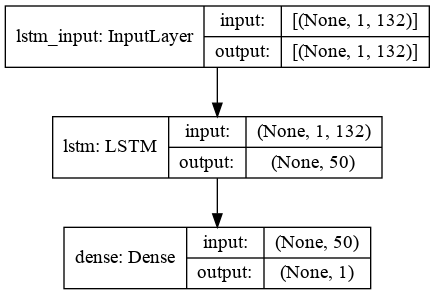

In [38]:
tf.keras.utils.plot_model(model2, to_file='model_plot1.png', show_shapes=True)

In [39]:
history2 = model2.fit(train_X2, y_train, epochs=100, batch_size=25, validation_data=(valid_X2, y_valid), verbose=2, shuffle=False)

Train on 10335 samples, validate on 1149 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
10335/10335 - 2s - loss: 736.5176 - val_loss: 383.0415
Epoch 2/100
10335/10335 - 1s - loss: 533.0560 - val_loss: 330.5175
Epoch 3/100
10335/10335 - 2s - loss: 446.7568 - val_loss: 313.3406
Epoch 4/100
10335/10335 - 2s - loss: 397.0663 - val_loss: 315.2998
Epoch 5/100
10335/10335 - 2s - loss: 365.3197 - val_loss: 303.7785
Epoch 6/100
10335/10335 - 2s - loss: 337.0495 - val_loss: 303.9777
Epoch 7/100
10335/10335 - 1s - loss: 312.5540 - val_loss: 301.6698
Epoch 8/100
10335/10335 - 1s - loss: 292.1375 - val_loss: 295.7446
Epoch 9/100
10335/10335 - 1s - loss: 275.5115 - val_loss: 293.8413
Epoch 10/100
10335/10335 - 1s - loss: 259.5934 - val_loss: 293.1549
Epoch 11/100
10335/10335 - 1s - loss: 246.4949 - val_loss: 291.8271
Epoch 12/100
10335/10335 - 1s - loss: 231.7136 - val_loss: 286.1997
Epoch 13/100
10335/10335 - 2s - loss: 218.3177 - v

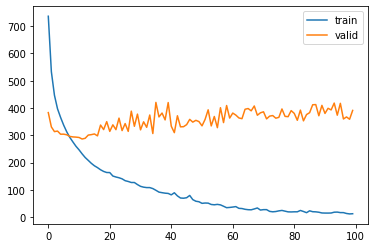

In [40]:
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='valid')
plt.legend()
plt.show()

In [41]:
y_valid_arr1 = np.array(y_valid).reshape((len(y_valid), 1))

In [42]:
yhat1 = model2.predict(valid_X2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                36600     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 36,651
Trainable params: 36,651
Non-trainable params: 0
_________________________________________________________________
None
Valid Score: 19.7739 RMSE
y_test (OBS) max: 427.24767084999996 versus inv_yhat2 (SIM) max: 378.64322


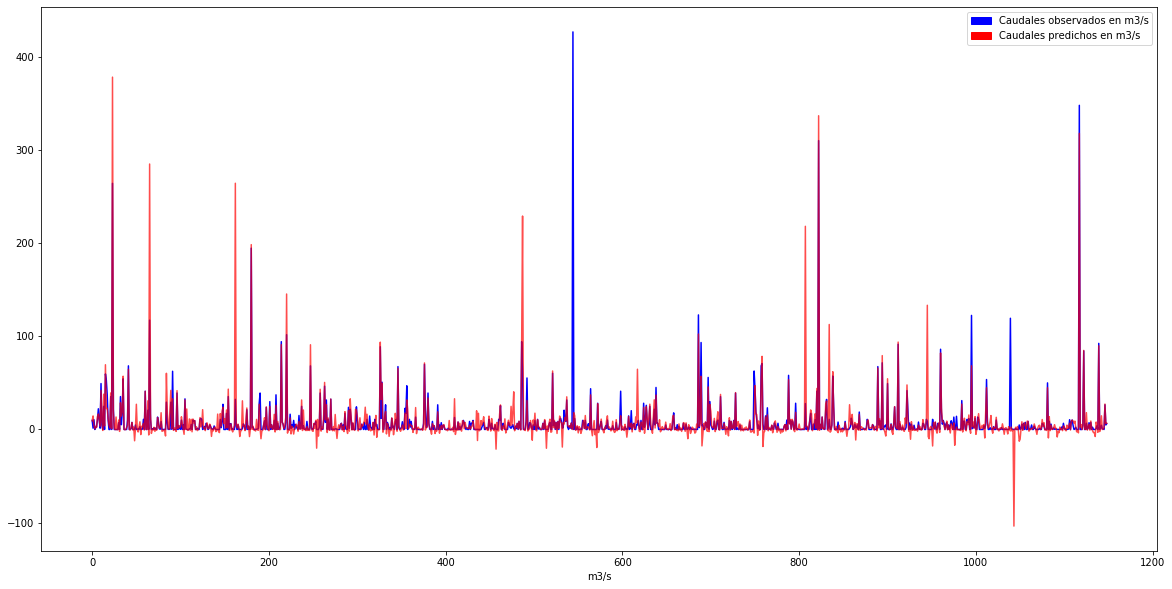

In [43]:
import matplotlib.patches as mpatches

print(model2.summary())
testScore2 = math.sqrt(mean_squared_error(y_valid_arr1, yhat1))
print('Valid Score: %.4f RMSE' % (testScore2))
print('y_test (OBS) max:',np.max(y_valid_arr1),'versus inv_yhat2 (SIM) max:',np.max(yhat1))
plt.figure(figsize=(20,10))
plt.plot(y_valid_arr1, color='blue', alpha=1)
plt.plot(yhat1,color='red', alpha=0.7, label="predicted value")
red_patch = mpatches.Patch(color='red', label='Caudales predichos en m3/s')
blue_patch = mpatches.Patch(color='blue', label='Caudales observados en m3/s')
plt.legend(handles=[blue_patch, red_patch])
plt.xlabel('timelapse')
plt.xlabel('m3/s')
plt.show()

In [44]:
from sklearn.metrics import r2_score
r2_score(y_valid_arr1,yhat1)

0.3989877822561765

In [45]:
model3 = Sequential()
model3.add(LSTM(50, input_shape=(train_X2.shape[1], train_X2.shape[2]), activation='relu', return_sequences=True))
model3.add(LSTM(100, return_sequences=True))
model3.add(LSTM(50, return_sequences=True))
model3.add(LSTM(20))
model3.add(Dense(1))
model3.compile(loss='mse', optimizer='adam')

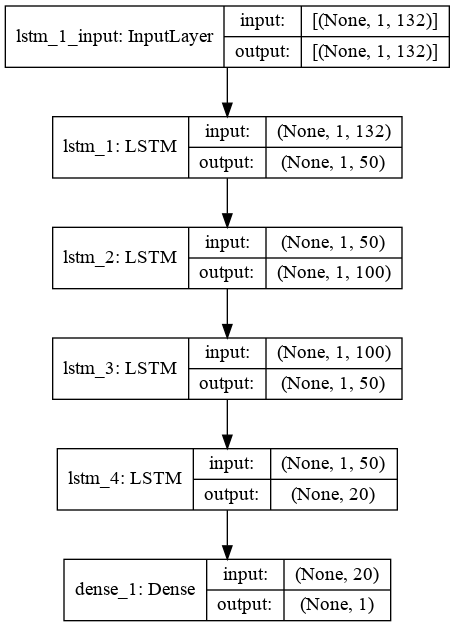

In [46]:
tf.keras.utils.plot_model(model3, to_file='model_plot2.png', show_shapes=True)

In [47]:
history3 = model3.fit(train_X2, y_train, epochs=100, batch_size=25, validation_data=(valid_X2, y_valid), verbose=2, shuffle=False)

Train on 10335 samples, validate on 1149 samples
Epoch 1/100
10335/10335 - 6s - loss: 979.2355 - val_loss: 617.9790
Epoch 2/100
10335/10335 - 3s - loss: 924.8663 - val_loss: 584.6343
Epoch 3/100
10335/10335 - 3s - loss: 891.9518 - val_loss: 561.7184
Epoch 4/100
10335/10335 - 3s - loss: 861.3083 - val_loss: 534.7906
Epoch 5/100
10335/10335 - 3s - loss: 833.3752 - val_loss: 523.0271
Epoch 6/100
10335/10335 - 4s - loss: 809.0385 - val_loss: 507.5679
Epoch 7/100
10335/10335 - 4s - loss: 787.4917 - val_loss: 487.3592
Epoch 8/100
10335/10335 - 4s - loss: 764.4318 - val_loss: 477.3331
Epoch 9/100
10335/10335 - 4s - loss: 743.3186 - val_loss: 456.4990
Epoch 10/100
10335/10335 - 4s - loss: 731.8972 - val_loss: 463.1318
Epoch 11/100
10335/10335 - 4s - loss: 706.3040 - val_loss: 453.4496
Epoch 12/100
10335/10335 - 3s - loss: 686.3227 - val_loss: 438.6568
Epoch 13/100
10335/10335 - 3s - loss: 670.0723 - val_loss: 431.3475
Epoch 14/100
10335/10335 - 4s - loss: 654.5796 - val_loss: 415.9389
Epoch 15

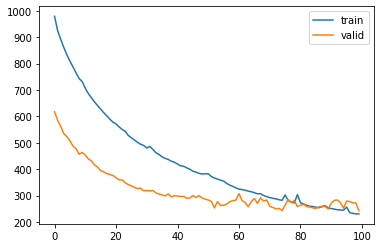

In [48]:
plt.plot(history3.history['loss'], label='train')
plt.plot(history3.history['val_loss'], label='valid')
plt.legend()
plt.show()

In [49]:
yhat2 = model3.predict(valid_X2)
# test_X2 = test_X3.reshape((test_X3.shape[0], test_X3.shape[2]))

In [50]:
rmse2 = sqrt(mean_squared_error(y_valid, yhat2))
rmse2

15.5757247388669

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 50)             36600     
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 100)            60400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 50)             30200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 20)                5680      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 132,901
Trainable params: 132,901
Non-trainable params: 0
_________________________________________________________________
None
Test Score: 15.5757 RMSE
y_test (OBS) max: 427.24767084999996 versus inv_yhat2 (SIM) max: 205.33856


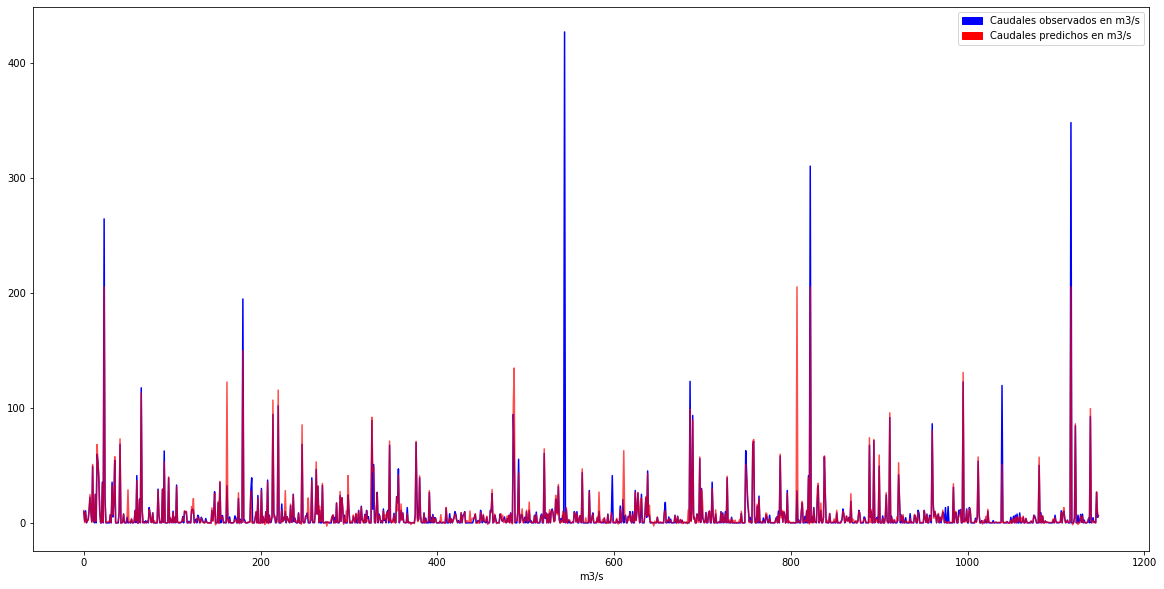

In [51]:
import matplotlib.patches as mpatches

y_valid_arr = np.array(y_valid).reshape((len(y_valid), 1))
print(model3.summary())
testScore2 = math.sqrt(mean_squared_error(y_valid_arr, yhat2))
print('Test Score: %.4f RMSE' % (testScore2))
print('y_test (OBS) max:',np.max(y_valid_arr),'versus inv_yhat2 (SIM) max:',np.max(yhat2))
plt.figure(figsize=(20,10))
plt.plot(y_valid_arr, color='blue', alpha=1)
plt.plot(yhat2,color='red', alpha=0.7, label="predicted value")
red_patch = mpatches.Patch(color='red', label='Caudales predichos en m3/s')
blue_patch = mpatches.Patch(color='blue', label='Caudales observados en m3/s')
plt.legend(handles=[blue_patch, red_patch])
plt.xlabel('timelapse')
plt.xlabel('m3/s')
plt.show()

In [52]:
from sklearn.metrics import r2_score
r2_score(y_valid_arr,yhat2)

0.6270989278714634

USING TEST SET

In [53]:
X_train_scaled_lstm = pd.DataFrame(scaler.transform(X_train))
X_test_scaled_lstm = pd.DataFrame(scaler.transform(X_test))

In [54]:
X_test.shape

(1276, 132)

In [55]:
X_train_lstm = X_train_scaled_lstm.values.reshape((X_train_scaled_lstm.shape[0], 1, X_train_scaled_lstm.shape[1]))
X_test_lstm = X_test_scaled_lstm.values.reshape((X_test_scaled_lstm.shape[0], 1, X_test_scaled_lstm.shape[1]))
print(train_X2.shape, y_train.shape, X_test_lstm.shape, y_test.shape)

(10335, 1, 132) (10335,) (1276, 1, 132) (1276,)


In [56]:
test_predictions = model3.predict(X_test_lstm)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 50)             36600     
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 100)            60400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 50)             30200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 20)                5680      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 132,901
Trainable params: 132,901
Non-trainable params: 0
_________________________________________________________________
None
Test Score: 16.8181 RMSE
y_test (OBS) max: 494.0581506 versus inv_yhat2 (SIM) max: 205.33372


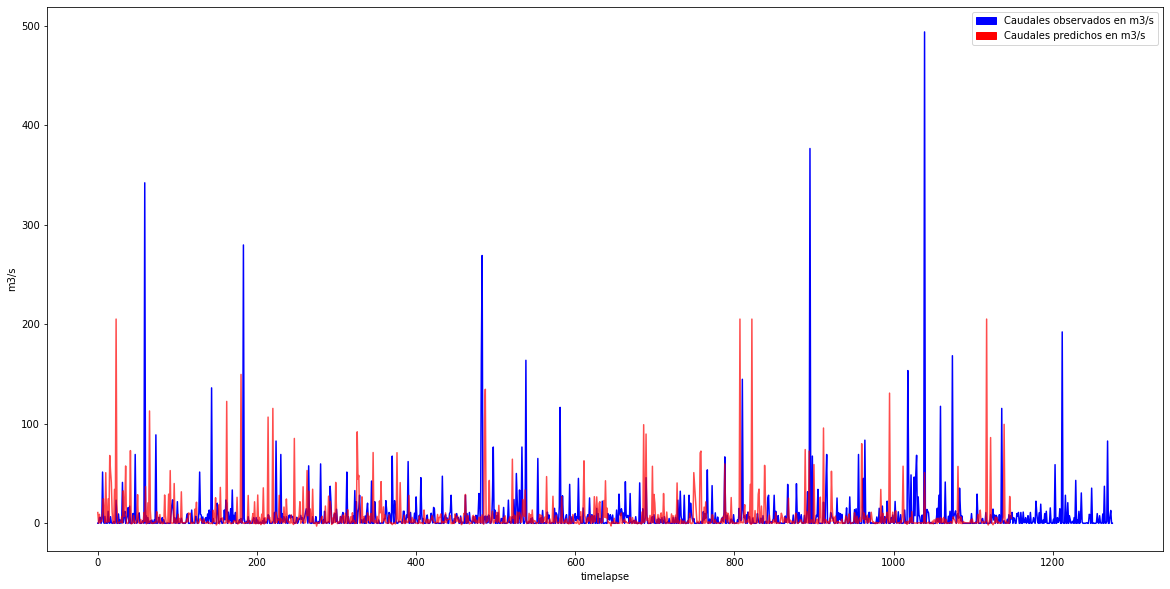

In [57]:
import matplotlib.patches as mpatches

y_test_arr = np.array(y_test).reshape((len(y_test), 1))
print(model3.summary())
testScore2 = math.sqrt(mean_squared_error(y_test, test_predictions))
print('Test Score: %.4f RMSE' % (testScore2))
print('y_test (OBS) max:',np.max(y_test),'versus inv_yhat2 (SIM) max:',np.max(test_predictions))
plt.figure(figsize=(20,10))
plt.plot(y_test_arr, color='blue', alpha=1)
plt.plot(yhat2,color='red', alpha=0.7, label="predicted value")
red_patch = mpatches.Patch(color='red', label='Caudales predichos en m3/s')
blue_patch = mpatches.Patch(color='blue', label='Caudales observados en m3/s')
plt.legend(handles=[blue_patch, red_patch])
plt.xlabel('timelapse')
plt.ylabel('m3/s')
plt.show()

In [59]:
from sklearn.metrics import r2_score
r2_score(y_test,test_predictions)

0.6420621886772035